In [2]:
import matplotlib.pyplot as plt
import numpy as np
from pydub import AudioSegment

from scipy import signal
from scipy.signal import butter, lfilter
from scipy.io import wavfile
from scipy.signal import fftconvolve

In [4]:
def mp3_to_wav(file_name: str):
    sound = AudioSegment.from_mp3(file_name)
    file_name = file_name.replace(".mp3", "")
    sound.export(f"{file_name}.wav", format="wav")


In [5]:
# mp3_to_wav("sound_from_diff_directions.mp3")

44100
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


c:\Users\srika\Desktop\VIT\6th sem\Samsung PRISM\Sound Localization Algo srcs\cipic_stuff\lib\site-packages\matplotlib\axes\_axes.py:7944: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


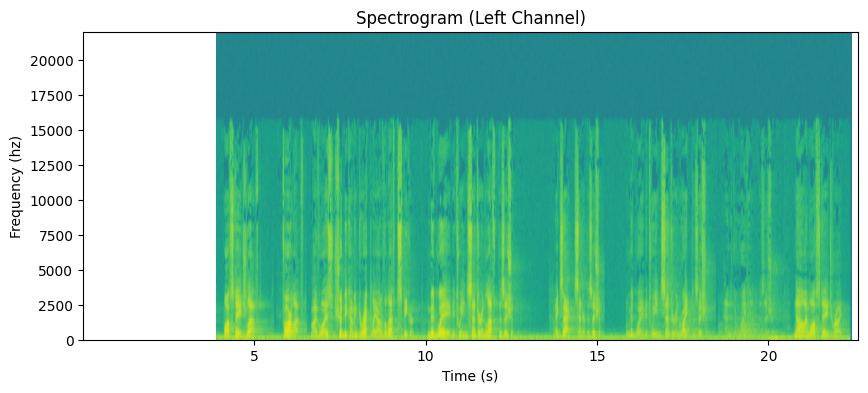

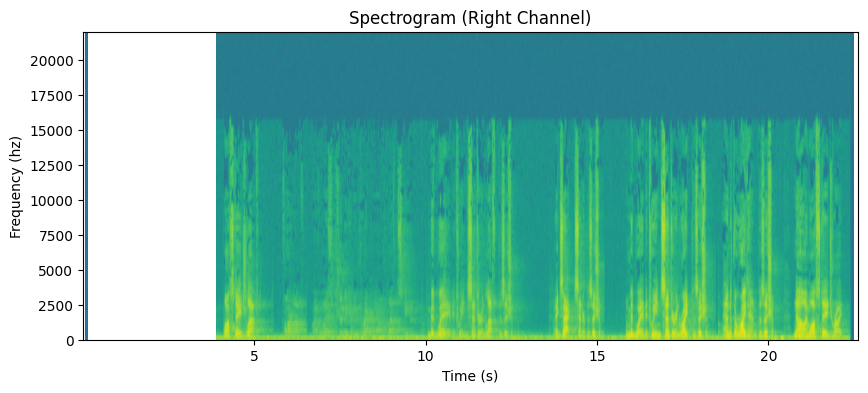

In [6]:
Fs, aud = wavfile.read('sound_from_diff_directions.wav')
print(Fs)
print(aud)
# Select left and right channels
aud_left = aud[:, 0]
aud_right = aud[:, 1]

# Create spectrogram for left channel
plt.figure(figsize=(10, 4))
plt.specgram(aud_left, Fs=Fs)
plt.title('Spectrogram (Left Channel)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (hz)')
plt.show()

# Create spectrogram for right channel
plt.figure(figsize=(10, 4))
plt.specgram(aud_right, Fs=Fs)
plt.title('Spectrogram (Right Channel)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (hz)')
plt.show()


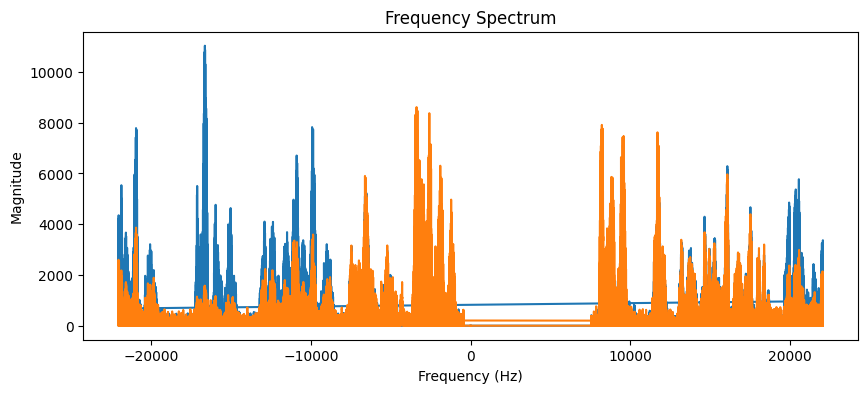

In [7]:
'''
To visualize the frequency spectrum of an audio signal, you can use the Fast Fourier Transform (FFT) provided by the `numpy` library. 

1. Import the necessary libraries (matplotlib, numpy, and scipy).
2. Read the audio file using `wavfile.read`.
3. Compute the FFT of the audio signal using `numpy.fft.fft`.
4. Compute the frequencies for the FFT using `numpy.fft.fftfreq`.
5. Plot the absolute value of the FFT spectrum.
'''

# Read the audio file
Fs, aud = wavfile.read('sound_from_diff_directions.wav')

# Compute the FFT
aud_fft = np.fft.fft(aud)

# Compute the frequencies
freqs = np.fft.fftfreq(len(aud), 1/Fs)

# Plot the spectrum
plt.figure(figsize=(10, 4))
plt.plot(freqs, np.abs(aud_fft))
plt.title('Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

'''
The blue and orange lines in your plot represent the frequency spectrum of the left and right channels of your stereo audio file, respectively. 

When you read a stereo audio file using `wavfile.read`, it returns a two-dimensional array where the first dimension represents time and the second dimension has two elements representing the left and right channels. When you compute the FFT and plot the spectrum, it computes and plots the spectrum for each channel separately.

So, in your plot:
- The blue line represents the frequency spectrum of the left channel.
- The orange line represents the frequency spectrum of the right channel.
'''

plt.show()


In [8]:
'''
You can apply a filter to an audio signal using the `scipy.signal` library in Python.

1. Import the necessary libraries (scipy and numpy).
2. Read the audio file using `wavfile.read`.
3. Design a filter using `scipy.signal.butter`.
4. Apply the filter to the audio signal using `scipy.signal.lfilter`.
5. Write the filtered audio to a new file using `wavfile.write`.
'''

# Read the audio file
Fs, aud = wavfile.read('sound_from_diff_directions.wav')

# Design a Butterworth filter
N  = 2    # Filter order
Wn = 0.1  # Cutoff frequency
B, A = butter(N, Wn, output='ba')

# Apply the filter to the audio signal
filtered_aud = lfilter(B, A, aud)

# Write the filtered audio to a new file
# wavfile.write('filtered_sound.wav', Fs, filtered_aud.astype(np.int16))

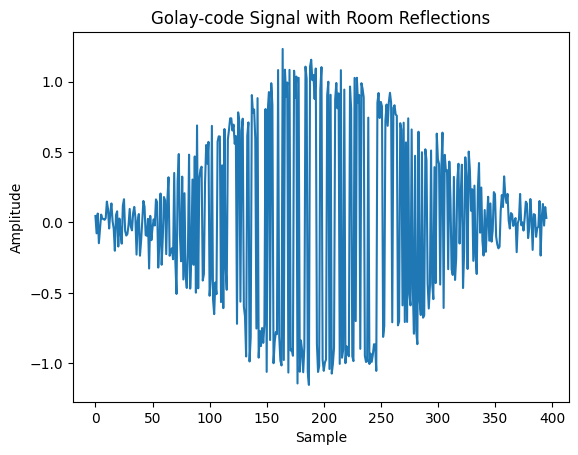

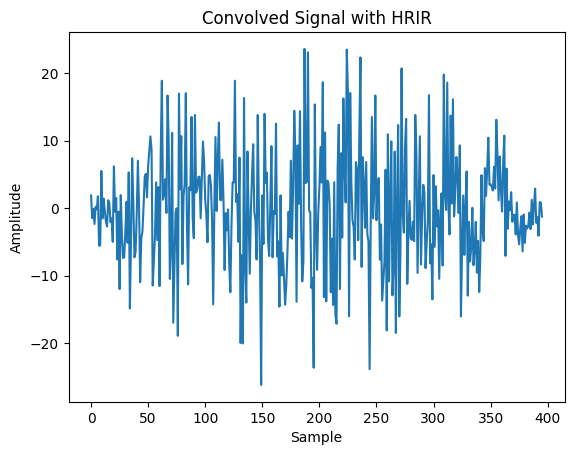

' This code generates a Golay-code signal, applies a Hanning window, adds simulated room reflections, and then convolves the signal with a simulated HRIR. Note that the HRIR data is randomly generated and should be replaced with the actual HRIR measurements from the experiment.\n\nFor an accurate reproduction, you would need the exact HRIR data and other parameters used in the experiment, which are not provided in the text. Additionally, the code may need further refinement based on the specific characteristics of the Bose Acoustimass loudspeakers and other equipment used in the experiment. '

In [5]:
# Constants
fs = 44100  # Sampling frequency (44.1 kHz)
duration = 0.0045  # Duration of the signal (4.5 ms)
length_hrir = int(fs * duration)  # Length of each HRIR

# Function to generate Golay codes
def generate_golay(length):
    code = np.random.choice([-1, 1], length)
    return code.astype(np.float64)  # Convert to float64

# Generate Golay codes
code1 = generate_golay(length_hrir)
code2 = generate_golay(length_hrir)

# Concatenate codes to form Golay-code signal
golay_signal = np.concatenate((code1, code2))

# Apply Hanning window to the Golay signal
golay_signal *= np.hanning(len(golay_signal))

# Simulate room reflections (not the exact room reflections removal mentioned)
room_reflections = np.random.normal(0, 0.1, len(golay_signal))
golay_signal_with_reflections = golay_signal + room_reflections

# Plot the Golay-code signal with reflections
plt.plot(golay_signal_with_reflections)
plt.title('Golay-code Signal with Room Reflections')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

# Simulate convolution with the HRIR
hrir = np.random.randn(length_hrir)  # Replace with the actual HRIR data
convolved_signal = fftconvolve(golay_signal_with_reflections, hrir, mode='same')

# Save convolved signal as WAV
wavfile.write("convolved_signal.wav", fs, convolved_signal.astype(np.int16))

# Plot the convolved signal
plt.plot(convolved_signal)
plt.title('Convolved Signal with HRIR')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

""" This code generates a Golay-code signal, applies a Hanning window, adds simulated room reflections, and then convolves the signal with a simulated HRIR. Note that the HRIR data is randomly generated and should be replaced with the actual HRIR measurements from the experiment.

For an accurate reproduction, you would need the exact HRIR data and other parameters used in the experiment, which are not provided in the text. Additionally, the code may need further refinement based on the specific characteristics of the Bose Acoustimass loudspeakers and other equipment used in the experiment. """

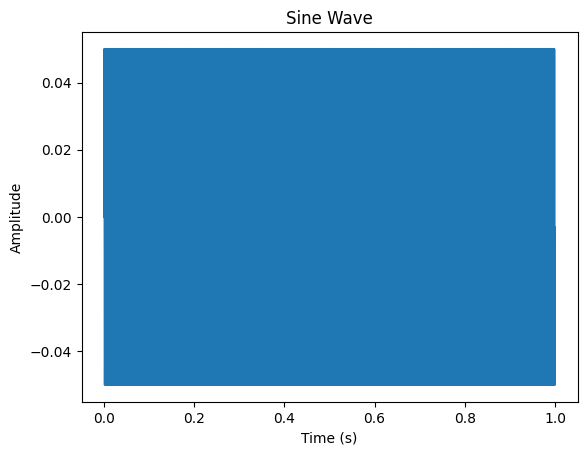

In [9]:
# Constants
fs = 44100  # Sampling frequency (44.1 kHz)
duration = 1.0  # Duration of the signal (1 second)

# Generate a simple sine wave
t = np.arange(0, duration, 1/fs)
frequency = 440  # 440 Hz for example, you can change this
amplitude = 0.05  # Adjust the amplitude (volume) by changing this factor
sine_wave = amplitude * np.sin(2 * np.pi * frequency * t)

# Save the sine wave as a WAV file
wavfile.write("sine_wave.wav", fs, (sine_wave * 32767).astype(np.int16))

'''
The value 32767 is used as a scaling factor to convert the floating-point values of the audio signal to 16-bit integer values suitable for storage in a WAV file. In a 16-bit audio format, the range of values is typically from -32768 to 32767.

When you generate a sine wave or any other audio signal in a floating-point format (where values can range from -1.0 to 1.0), you need to scale and convert those values to integers before saving them in a WAV file. The scaling factor 32767 is often used because it represents the maximum positive value that a 16-bit signed integer can hold.

So, the line (sine_wave * 32767).astype(np.int16) scales the sine wave values to fit within the range of a 16-bit signed integer and then converts them to the np.int16 data type before saving to a WAV file. This is a common practice in audio processing to ensure compatibility with standard audio file formats.
'''

# Plot the sine wave
plt.plot(t, sine_wave)
plt.title('Sine Wave')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

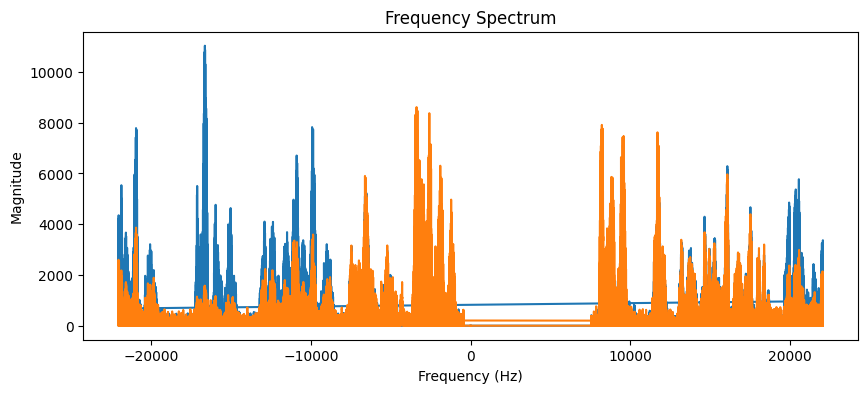

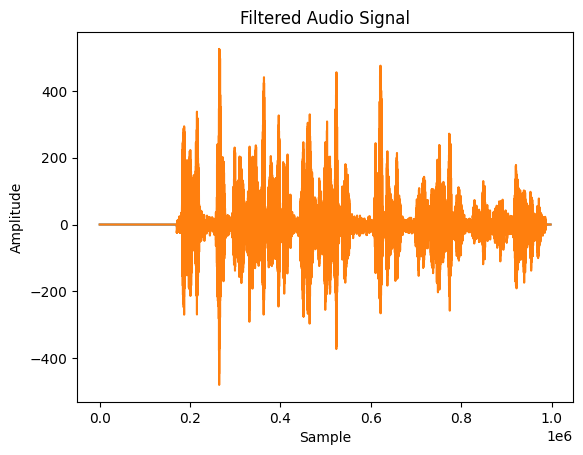

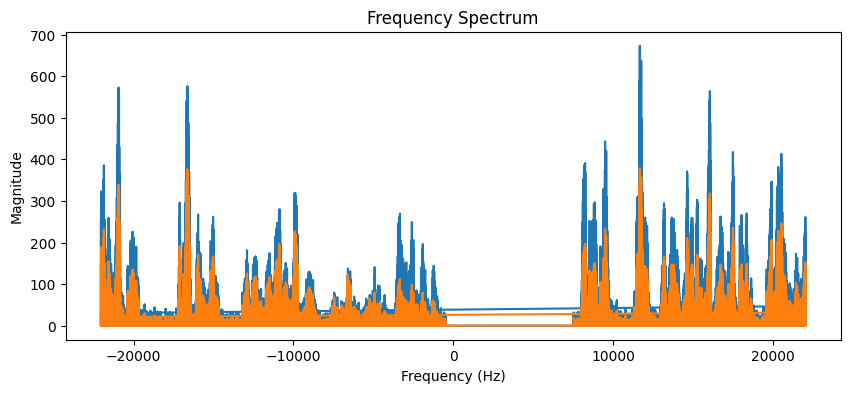

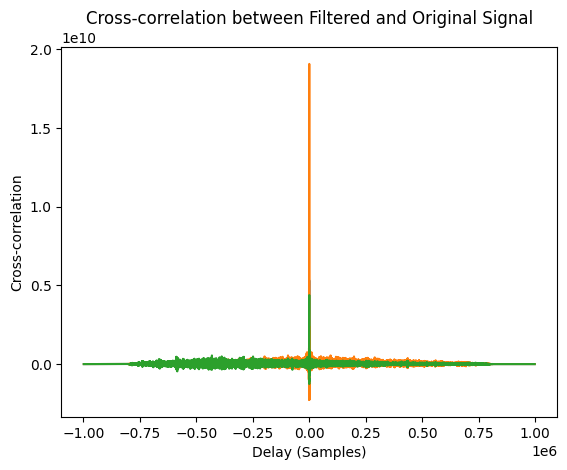

In [5]:
# algorithm to find sound's doa from the sound source from wav file

# Read the audio file
Fs, aud = wavfile.read('sound_from_diff_directions.wav')

# Compute the FFT
aud_fft = np.fft.fft(aud)

# Compute the frequencies
freqs = np.fft.fftfreq(len(aud), 1/Fs)

# Plot the spectrum
plt.figure(figsize=(10, 4))
plt.plot(freqs, np.abs(aud_fft))
plt.title('Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

# Design a Butterworth filter
N  = 2    # Filter order
Wn = 0.1  # Cutoff frequency
B, A = butter(N, Wn, output='ba')

# Apply the filter to the audio signal
filtered_aud = lfilter(B, A, aud)

# Write the filtered audio to a new file
# wavfile.write('filtered_sound.wav', Fs, filtered_aud.astype(np.int16))

# Plot the filtered signal
plt.plot(filtered_aud)
plt.title('Filtered Audio Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

# Compute the FFT of the filtered signal
filtered_aud_fft = np.fft.fft(filtered_aud)

# Plot the spectrum
plt.figure(figsize=(10, 4))
plt.plot(freqs, np.abs(filtered_aud_fft))
plt.title('Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

# Compute the cross-correlation
corr = fftconvolve(filtered_aud, aud[::-1], mode='full')

# Find the delay between the signals
delay_arr = np.arange(1-len(aud), len(aud))
# delay = delay_arr[np.argmax(corr)]

# Print the delay and convert it to time
# print(f"Delay: {delay / Fs} seconds")

# Plot the cross-correlation
plt.plot(delay_arr, corr)
plt.title('Cross-correlation between Filtered and Original Signal')
plt.xlabel('Delay (Samples)')
plt.ylabel('Cross-correlation')
plt.show()
